In [17]:
#Simple workflow using Langgraph 

In [18]:
#State define the graph- Input Schema for graph
from typing import TypedDict
class State(TypedDict):
    graph_info:str

In [19]:
#Nodes - are jsut python functions 
def start_play(state: State):
    print("Start node been called")
    return {"graph_info": state['graph_info'] + "I'm planning to play"}

def badminton(state: State):
    print("Badminton node been called")
    return {"graph_info": state['graph_info'] + "I will play badminton"} 

def cricket(state: State):
    print("Cricket node been called")
    return {"graph_info": state['graph_info'] + "I will play cricket"} 
#state already have previous message 

In [20]:
from typing import Literal
import random
def random_play(state:State)->Literal["badminton", "cricket"]:
    graph_info = state['graph_info']
    if random.random()>0.5:
        return "badminton"
    else:        
        return "cricket"

In [21]:
from langgraph.graph import StateGraph,START,END
graph=StateGraph(State)
#Adding Nodes to graph
graph.add_node("start_play",start_play)
graph.add_node("badminton",badminton)
graph.add_node("cricket",cricket)

In [22]:
#Flow of graph
graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play) #We are deciding here
graph.add_edge("badminton",END)
graph.add_edge("cricket",END)

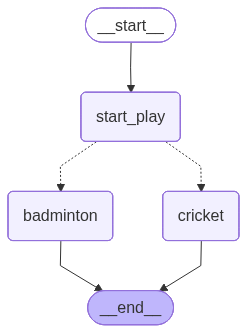

In [23]:
graph_builder=graph.compile()
graph_builder

In [24]:
#GRAPH invoke
graph_builder.invoke({"graph_info": "I want to play a sport"})
#all state info cascide into state

Start node been called
Cricket node been called


{'graph_info': "I want to play a sportI'm planning to playI will play cricket"}